# Load data

In [1]:
from sklearn import cluster

import data
import plot
import evaluation


data_bin, words = data.load_vectors("binvectors256.vec", n_words=100)

# Cluster using ART1

-0.03055857320505413


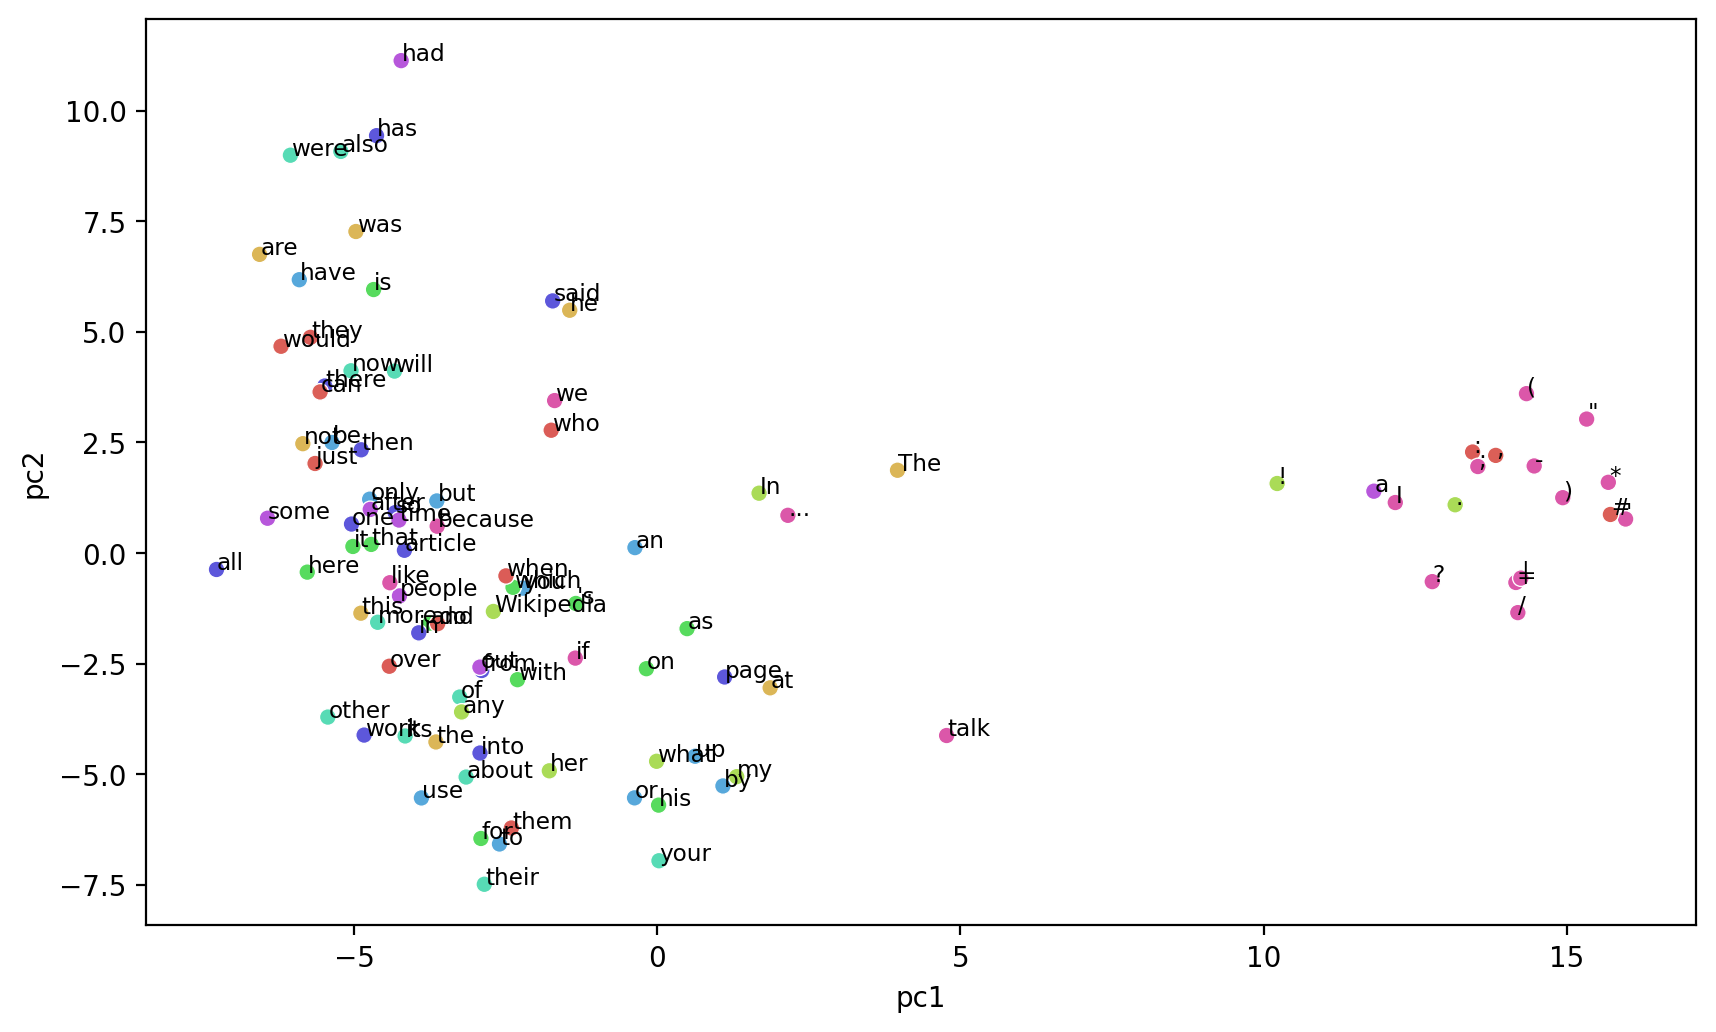

In [2]:
from neupy import algorithms

artnet = algorithms.ART1(
        step=0.1,
        rho=0.1,
        n_clusters=10,
        shuffle_data=False
    )
evaluation.evaluate_model(artnet, data_bin, words, "ART")

# Cluster using Agglomerative clustering

In [3]:

# For binary, manhattan=hamming
agg = cluster.AgglomerativeClustering(n_clusters=10, affinity="manhattan", linkage="average")
clusters_agg = agg.fit_predict(data_bin)
print(silhouette_score(X=data_bin, labels=clusters_agg, metric="euclidean"))
print(silhouette_score(X=data_bin, labels=clusters_agg, metric="hamming"))
plot.plot(data_bin, words, clusters_agg)

NameError: name 'silhouette_score' is not defined

# Cluster using OPTICS

In [ ]:

opt = cluster.OPTICS(metric="hamming")
clusters_opt = opt.fit_predict(data_bin)
print(silhouette_score(X=data_bin, labels=clusters_opt, metric="euclidean"))
print(silhouette_score(X=data_bin, labels=clusters_opt, metric="hamming"))
plot.plot(data_bin, words, clusters_opt)

# Affinity propagation (distance metric correct?)

In [ ]:
aff = cluster.AffinityPropagation(random_state=None)
clusters_aff = aff.fit_predict(data_bin)
print(silhouette_score(X=data_bin, labels=clusters_aff, metric="euclidean"))
print(silhouette_score(X=data_bin, labels=clusters_aff, metric="hamming"))
plot.plot(data_bin, words, clusters_aff)